### Build a DNN using Keras with `RELU` and `ADAM`

#### 1. Load tensorflow (1 Mark)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
tf.compat.v1.reset_default_graph()
tf.__version__

'1.15.0'

#### 2. Collect Fashion mnist data from tf.keras.datasets (1 Mark)

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

#### Please run this cell as class names are not included, need to create them to plot the images

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### 3(a). Display Shapes of Train and Test sets (0.5 Mark)

In [4]:
print('Shape of trainX : {}\nShape of trainY: {}'.format(train_x.shape, train_y.shape))
print('Shape of testX : {}\nShape of testY: {}'.format(test_x.shape, test_y.shape))

Shape of trainX : (60000, 28, 28)
Shape of trainY: (60000,)
Shape of testX : (10000, 28, 28)
Shape of testY: (10000,)


#### 3(b). Check how many classes (unique categories) we have in target column (0.5 Mark)

#### Hint: np.unique

In [5]:
print("Number of classes in Train-set : {}\nNumber of classes in Test-set : {}".format(len(np.unique(train_y)), len(np.unique(test_y))))
print("Classes in Train-set : {}\nClasses in Test-set : {}".format(np.unique(train_y), np.unique(test_y)))

Number of classes in Train-set : 10
Number of classes in Test-set : 10
Classes in Train-set : [0 1 2 3 4 5 6 7 8 9]
Classes in Test-set : [0 1 2 3 4 5 6 7 8 9]


#### 4. Plot/Visualize the first image from the training dataset using matplotlib's imshow and display the class name below the image (2 Marks)

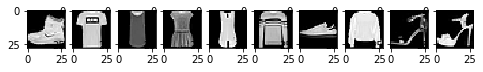

Train Labels :  [9 0 0 3 0 2 7 2 5 5]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
for i in range(10): 
    plt.subplot(2, 10, i + 1)    
    plt.imshow(train_x[i,:].reshape([28,28]), cmap='gray')
plt.show()
print("Train Labels : ",train_y[0:10])

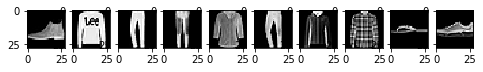

Test Labels :  [9 2 1 1 6 1 4 6 5 7]


In [7]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(2, 10, i + 1)    
    plt.imshow(test_x[i,:].reshape([28,28]), cmap='gray')
plt.show()
print("Test Labels : ",test_y[0:10])

#### 5. Change train and test labels into one-hot vectors (1 Mark)

In [0]:
#Convert labels to one hot encoding
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

### Build the Graph

#### 6.Initialize model, reshape & batch normalize data (1 Mark)

In [0]:
#from keras.layers import Dense, Dropout, Reshape, BatchNormalization

In [10]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### 7(a). Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. (1 Mark)

In [0]:

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### 7(b). Add a dropout layer with `p=0.25` (1 Mark)

In [0]:
#Add a Dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#### 8. Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. (1 Mark)

In [0]:
#Add Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

### Compile Model
#### 9. Use `categorical_crossentropy` loss, `adam` optimizer, `accuracy` metric and compile the model. (1 Mark)

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training
#### 10. Fit your model on train set, using validation_split=0.2, epochs=10 and batch_size=32 and assign it to a variable "hist_model" which can be used to plot loss and accuracy curves using saved history. (5 Marks)

In [15]:
hist_model = model.fit(train_x, train_y, validation_split=0.2, epochs=10, batch_size=32)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 202us/sample - loss: 0.5337 - acc: 0.8124 - val_loss: 0.3730 - val_acc: 0.8627
Epoch 2/10
48000/48000 [==============================] - 9s 179us/sample - loss: 0.4088 - acc: 0.8504 - val_loss: 0.3434 - val_acc: 0.8736
Epoch 3/10
48000/48000 [==============================] - 9s 193us/sample - loss: 0.3717 - acc: 0.8640 - val_loss: 0.3240 - val_acc: 0.8822
Epoch 4/10
48000/48000 [==============================] - 9s 182us/sample - loss: 0.3432 - acc: 0.8740 - val_loss: 0.3204 - val_acc: 0.8809
Epoch 5/10
48000/48000 [==============================] - 9s 188us/sample - loss: 0.3262 - acc: 0.8779 - val_loss: 0.3160 - val_acc: 0.8866
Epoch 6/10
48000/48000 [==============================] - 9s 189us/sample - loss: 0.3099 - acc: 0.8871 - val_loss: 0.3132 - val_acc: 0.8870
Epoch 7/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.2940 - acc: 0.8915 - val_

### Model Evaluation

#### 11. Visualize/Plot loss curves for training data, val data and provide your inference (2 Marks)

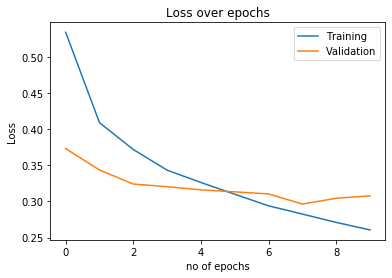

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss over epochs')
plt.show()

#### Observations:
- The training loss is decreasing more over 10 epochs and has decreased from 0.5 to 0.2, but the decrease in validation loss is very less from 0.37 to 0.30
- The model is performing well on the training data, because the decrese in lsss is huge, but it is not performing well on the test data, as the decrese in losss is very minimal

#### 12. Visualize/Plot accuracy curves for training data, val data and provide your inference (2 Marks)

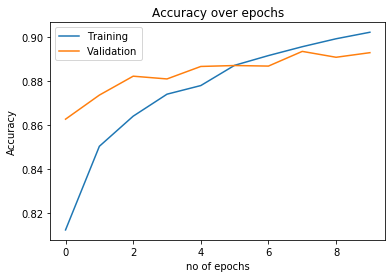

In [20]:
plt.plot(hist_model.history['acc'])
plt.plot(hist_model.history['val_acc'])
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy over epochs')
plt.show()

#### Observations:
- The model accuracy is increasing from a very low to as high as 90% over 10 epochs for the training set, but the model accuracy is increasing from 86% to 89% on the test dataset.
- We can say the model is learning very well on training set, but not so well on test set.

In [0]:
#### 13. Evaluate the above model on test set and report test loss & accuracy (1 Mark)
#### Hint: model.evaluate()

In [22]:
model.evaluate(train_x, train_y, verbose=0)

[0.24409505496422448, 0.91866666]

In [23]:
model.evaluate(test_x, test_y, verbose=0)

[0.37707328519821165, 0.8836]

#### 14. Predict the labels for test set and store in a variable named "predictions" (1 Mark)

#### Hint: model.predict()

In [0]:
#Predit labels
predictions = model.predict(x=test_x)

In [67]:
#Sample Predictions
predictions[0:2]

array([[3.9895642e-07, 1.7290908e-07, 1.0953053e-08, 5.6288968e-07,
        7.6317175e-09, 6.7131140e-04, 6.6174880e-07, 1.1906420e-02,
        2.2619668e-06, 9.8741829e-01],
       [1.7271153e-06, 1.0615975e-09, 9.9908805e-01, 1.6217600e-08,
        7.3037314e-04, 2.0742191e-06, 1.7768271e-04, 7.1142447e-10,
        3.3782990e-11, 5.9675181e-10]], dtype=float32)

In [0]:
predicted_labels = model.predict_classes(test_x)

In [69]:
#Sample Predicted classes
predicted_labels[0:2]

array([9, 2])

#### 15. Write a for loop to visualize, display actual label, predicted label along with class names for 0th, 100th and 200th images in test set.  
#### (3 Marks)

Image at index: 0


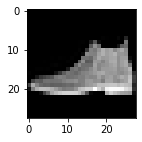

Actual Label for 0th image : 9
Predicted Label for 0th image : 9
Class name for 0th image : Ankle boot

Image at index: 100


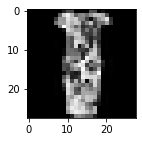

Actual Label for 100th image : 3
Predicted Label for 100th image : 3
Class name for 100th image : Dress

Image at index: 200


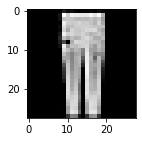

Actual Label for 200th image : 1
Predicted Label for 200th image : 1
Class name for 200th image : Trouser



In [64]:
for i in range(0,201,100):
    print('Image at index:', i)
    plt.figure(figsize=(2, 2))    
    plt.imshow(test_x[i,:].reshape([28,28]), cmap='gray')
    plt.show()
    print('Actual Label for {}th image : {}'.format(i,np.argmax(test_y[i], axis=0)))
    print('Predicted Label for {}th image : {}'.format(i,predicted_labels[i]))
    print('Class name for {}th image : {}\n'.format(i,class_names[np.argmax(test_y[i], axis=0)]))